In [2]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = [0, 6]
    ylim = [2.5, 6.5]

    # plot the decision surface
    colors = ('lightblue', 'orange', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:2])
    x1_min, x1_max = xlim[0] - 1, xlim[1] + 1
    x2_min, x2_max = ylim[0] - 1, ylim[1] + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)    
    
    # create grid to evaluate model
    x = np.linspace(0, 6, 30)
    y = np.linspace(2.5, 6.5, 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolor='black', facecolors='none');
    ax.set_xlim([0, 6])
    ax.set_ylim(ylim)

C = 1.0,  class:  1
C = 0.1,  class:  1


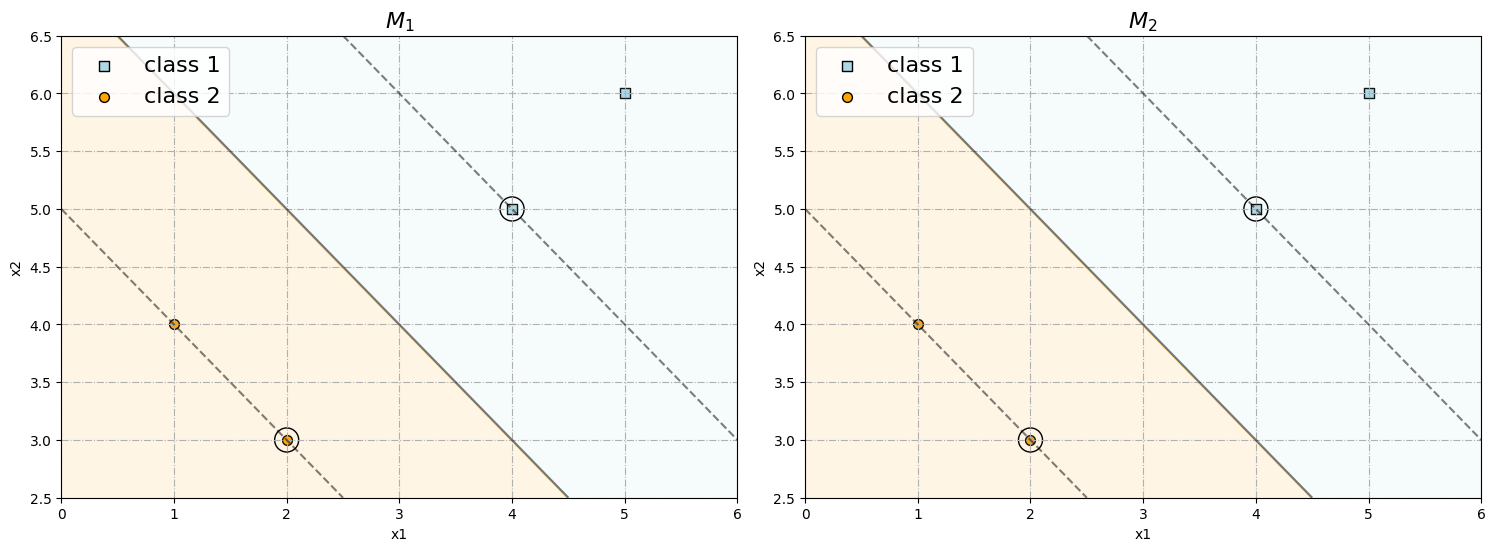

In [4]:
from sklearn.svm import SVC

X = np.array([[1,4],[2,3],[4,5],[5,6]] )
y = np.array([1, 1, -1, -1])

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

cnt=0
for axi, C in zip(ax, [1e0, 0.1]):
    model = SVC(kernel='linear').fit(X, y)
    
    axi.scatter(X[y == -1, 0],
            X[y == -1, 1],
            s=50, c='lightblue',
            marker='s', edgecolor='black',
            label='class 1')
    axi.scatter(X[y == 1, 0],
                X[y == 1, 1],
                s=50, c='orange',
                marker='o', edgecolor='black',
                label='class 2')
    
    print('C = {0:.1f}, '.format(C), "class: ", model.predict(np.array([[0.6,2.45]]))[0])
    
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('$M_{0:.0f}$'.format(cnt+1), size=16)
    cnt+=1
    axi.legend(loc='upper left', fontsize=16)
    axi.grid(True, linestyle='-.')
    axi.set_xlabel('x1')
    axi.set_ylabel('x2')
plt.savefig('softsvm.pdf', format='pdf')

In [5]:

clf = SVC(kernel = 'linear')
clf.fit(X, y) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[-0.5 -0.5]]
b =  [3.5]
Indices of support vectors =  [2 1]
Support vectors =  [[4. 5.]
 [2. 3.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.25 0.25]]


C = 1000000.0,  class:  1
C = 0.1,  class:  1


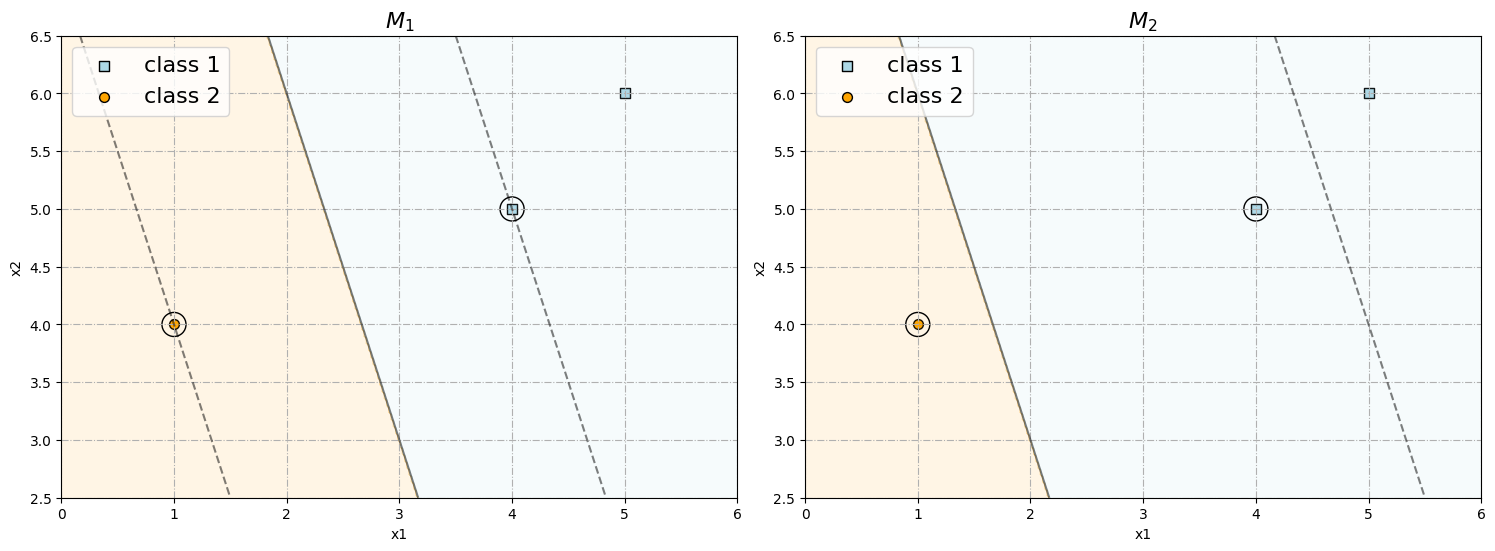

In [6]:
X = np.array([[1,4],[4,5],[5,6]] )
y = np.array([1, -1, -1])

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

cnt=0
for axi, C in zip(ax, [1e6, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    
    axi.scatter(X[y == -1, 0],
            X[y == -1, 1],
            s=50, c='lightblue',
            marker='s', edgecolor='black',
            label='class 1')
    axi.scatter(X[y == 1, 0],
                X[y == 1, 1],
                s=50, c='orange',
                marker='o', edgecolor='black',
                label='class 2')
    
    print('C = {0:.1f}, '.format(C), "class: ", model.predict(np.array([[0.6,2.45]]))[0])
    
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('$M_{0:.0f}$'.format(cnt+1), size=16)
    cnt+=1
    axi.legend(loc='upper left', fontsize=16)
    axi.grid(True, linestyle='-.')
    axi.set_xlabel('x1')
    axi.set_ylabel('x2')
plt.savefig('softsvm.pdf', format='pdf')

C = 1000000.0,  class:  1
C = 0.1,  class:  1


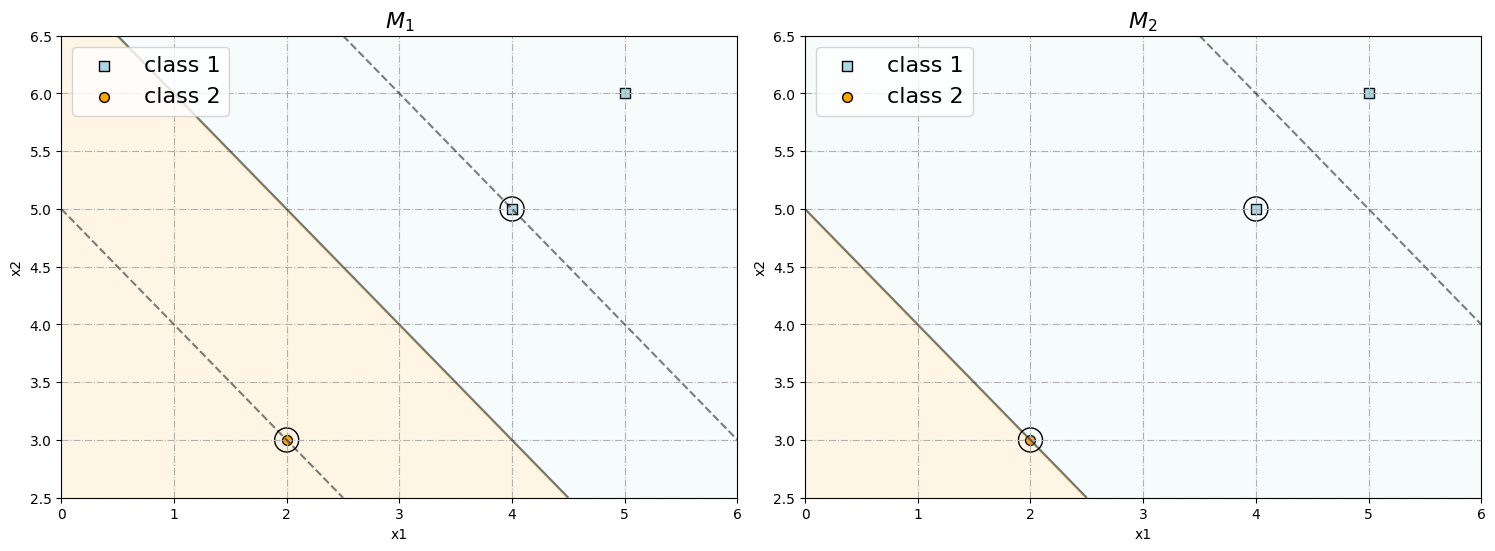

In [7]:
X = np.array([[2,3],[4,5],[5,6]] )
y = np.array([1, -1, -1])

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

cnt=0
for axi, C in zip(ax, [1e6, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    
    axi.scatter(X[y == -1, 0],
            X[y == -1, 1],
            s=50, c='lightblue',
            marker='s', edgecolor='black',
            label='class 1')
    axi.scatter(X[y == 1, 0],
                X[y == 1, 1],
                s=50, c='orange',
                marker='o', edgecolor='black',
                label='class 2')
    
    print('C = {0:.1f}, '.format(C), "class: ", model.predict(np.array([[0.6,2.45]]))[0])
    
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('$M_{0:.0f}$'.format(cnt+1), size=16)
    cnt+=1
    axi.legend(loc='upper left', fontsize=16)
    axi.grid(True, linestyle='-.')
    axi.set_xlabel('x1')
    axi.set_ylabel('x2')
plt.savefig('softsvm.pdf', format='pdf')